<a href="https://colab.research.google.com/github/neemasingh/neema/blob/master/stock_price_prediction_using_GRU/arimasvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import SVR
 
def parser(x):
    return datetime.strptime(x,'%d-%m-%Y')
 
series = read_csv('/content/residuals.csv')



In [0]:
print (series)

        Residuals
0    10849.672236
1    10973.665987
2    11039.239176
3    11044.441017
4    11021.632946
..            ...
235  12100.068936
236  12032.394466
237  11979.075208
238  12112.523443
239  12067.457140

[240 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

predicted=11210.660776, expected=11393.515059
Test MSE: 20333.726


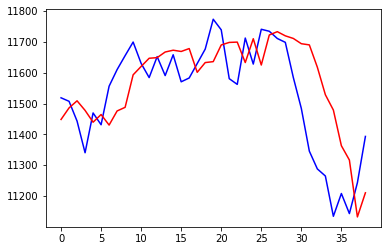

[array([11448.58471429]), array([11486.09246886]), array([11509.03979622]), array([11477.98207503]), array([11439.7456685]), array([11464.55230048]), array([11430.35428851]), array([11476.1586031]), array([11487.9347905]), array([11593.34600364]), array([11620.55872105]), array([11647.09633008]), array([11649.12677772]), array([11667.33105634]), array([11673.21065718]), array([11669.13204051]), array([11678.53789499]), array([11601.49014468]), array([11633.1069591]), array([11636.1144815]), array([11690.23368901]), array([11698.47882034]), array([11699.50492621]), array([11633.17896334]), array([11710.44313396]), array([11625.18219612]), array([11722.60964249]), array([11733.33841829]), array([11719.83328621]), array([11711.37295653]), array([11694.27734851]), array([11690.45450298]), array([11617.99822739]), array([11528.86079008]), array([11479.09821805]), array([11363.39755197]), array([11316.9650526]), array([11132.44042792]), array([11210.66077604])]




In [0]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier

series = np.array(series)
series = series[0:50]
epsilon = 0.2 # if the difference between predicted value and true value>epsilon in ARIMA, feed into SVR
outlier = list()

size = int(len(series) * 1)
train, test = series[0:size], series[size:len(series)]
true_data = list()
history = list()
start_point = 10
for i in range(0,start_point):
    history.append(train[i])
predictions = list()
for t in range(start_point,len(train)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    if abs(yhat-train[t]) > epsilon:
        outlier.append(train[t]) #if a point is outlier, put its index into the set
    else:
        predictions.append(yhat)
        true_data.append(train[t])
        obs = train[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
        

history = list()
history.append(outlier[0])
for t in range(1, len(outlier)):
    predicted_data = np.arange(len(history),len(history)+1)
    predicted_data = np.expand_dims(predicted_data,axis=1)
    train_data = np.arange(0,len(history))
    train_data = np.expand_dims(train_data,axis=1)
    svr = SVR(kernel='rbf', C=1e3, gamma = 1/1250)
    yhat = svr.fit(train_data,history).predict(predicted_data)
    true_data.append(outlier[t])
    predictions.append(yhat)
    obs = outlier[t]
    history.append(obs)
print('predicted=%f, expected=%f' % (yhat, obs))


#========================================
error = mean_squared_error(true_data, predictions)
print('Test MSE: %.3f' % error)
# plot

plt.plot(true_data, color='blue')
plt.plot(predictions, color='red')
plt.show()
print (predictions)
print ("\n")

